<a href="https://colab.research.google.com/github/ewapastorczak/dataviz/blob/main/Ex2_Telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#essential data analysis
import numpy as np
#friendly data exploration
import pandas as pd
#essential plot production
import matplotlib.pyplot as plt
#matplotlib but pretty
import seaborn as sns
#matplotlib but modern
import plotly

In [ ]:
url = 'https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv'
df=pd.read_csv(url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()
print(df['TotalCharges'].isnull().sum())
print((df['TotalCharges']==' ').sum())
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

0
11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
df.Churn.value_counts()

,count
Churn,
No,5163
Yes,1869


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


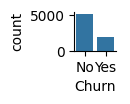

In [ ]:
sns.catplot(data=df,x='Churn',kind='count',height=0.5)

Pie chart: good for showing the percentage when there a few categories adding up to a 100%

([<matplotlib.patches.Wedge at 0x783df8d08610>,
 [Text(-0.7383052116910712, 0.8154173252941114, ''),
  Text(0.738305282977118, -0.8154172607494141, '')])

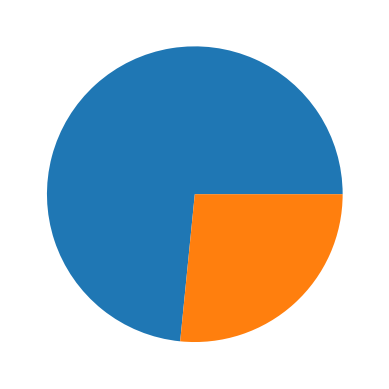

In [ ]:
plt.pie(df.Churn.value_counts())

([<matplotlib.patches.Wedge at 0x79758bd839d0>,
 [Text(-0.7383052116910712, 0.8154173252941114, 'No'),
  Text(0.738305282977118, -0.8154172607494141, 'Yes')])

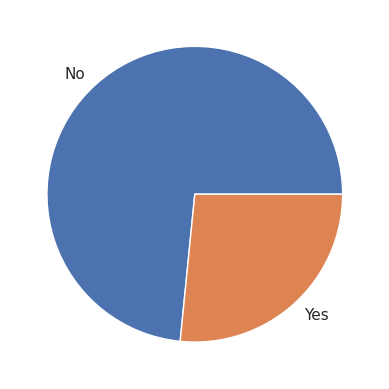

In [ ]:
sns.set()
plt.pie(df.Churn.value_counts(),labels=df.Churn.value_counts().index)

([<matplotlib.patches.Wedge at 0x7edab0503950>,
 [Text(-0.7383051242403968, 0.8154174044747711, 'No'),
  Text(0.7718644480695054, -0.8524818319508973, 'Yes')])

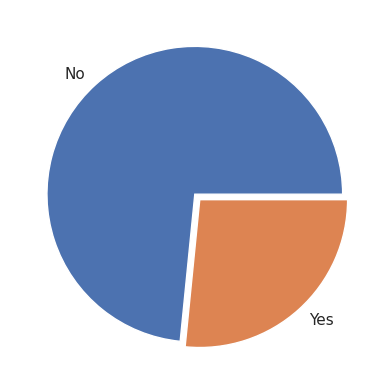

In [ ]:
plt.pie(df.Churn.value_counts(),labels=df.Churn.value_counts().index,explode=[0,0.05])

Autopct displays the percent value using Python string formatting

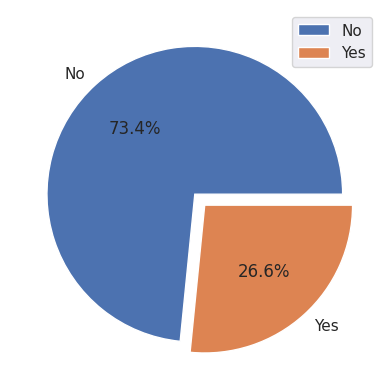

In [ ]:
plt.pie(df.Churn.value_counts(),labels=df.Churn.value_counts().index,explode=[0,0.1],autopct='%1.1f%%')
plt.legend()
#plt.xlabel('')
#plt.ylabel(' ')

Text(0.5, 1.0, 'Churn distribution')

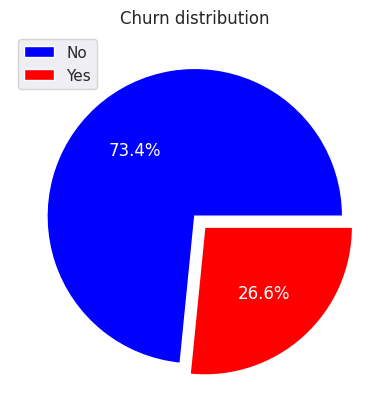

In [ ]:
sns.set_palette("Paired")
#sns.set_style("whitegrid")
plt.pie(df.Churn.value_counts(),labels=[' ',' '],explode=[0,0.1],autopct='%1.1f%%',textprops=dict(color="w"))
plt.legend(loc=2, labels=df.Churn.value_counts().index)
plt.title('Churn distribution')

Text(0.5, 1.0, 'gender distribution')

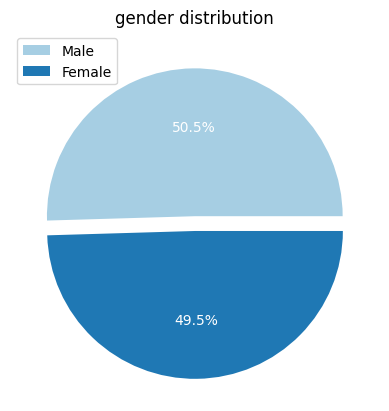

In [ ]:
sns.set_palette("Paired")
#sns.set_style("whitegrid")
plt.pie(df.gender.value_counts(),labels=[' ',' '],explode=[0,0.1],autopct='%1.1f%%',textprops=dict(color="w"))
plt.legend(loc=2, labels=df.gender.value_counts().index)
plt.title('gender distribution')

Text(0.5, 1.0, 'Senior Citizen distribution')

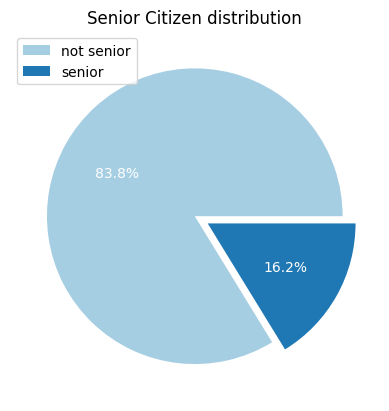

In [ ]:
sns.set_palette("Paired")
#sns.set_style("whitegrid")
plt.pie(df.SeniorCitizen.value_counts(),labels=[' ',' '],explode=[0,0.1],autopct='%1.1f%%',textprops=dict(color="w"))
plt.legend(loc=2, labels=['not senior','senior'])
plt.title('Senior Citizen distribution')

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

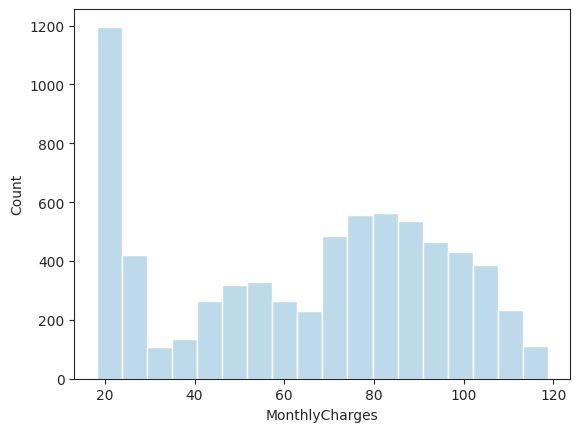

In [ ]:
sns.set_style('ticks')
sns.histplot(df.MonthlyCharges)

<Axes: xlabel='tenure', ylabel='Count'>

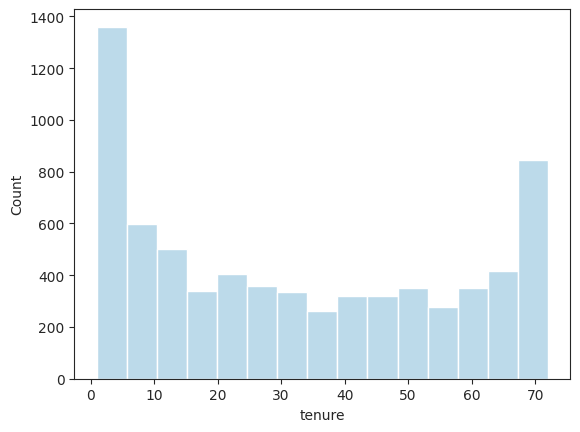

In [ ]:
sns.set_style('ticks')
sns.histplot(df.tenure)

Now we need to define an object we will refer to later on.

Text(0.5, 1.0, 'Tenure')

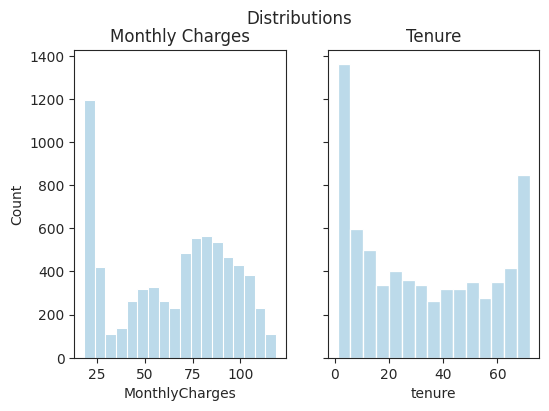

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(6,4))
sns.histplot(df.MonthlyCharges,ax=ax[0])
sns.histplot(df.tenure,ax=ax[1])
fig.suptitle('Distributions')

ax[0].set_title('Monthly Charges')
ax[1].set_title('Tenure')

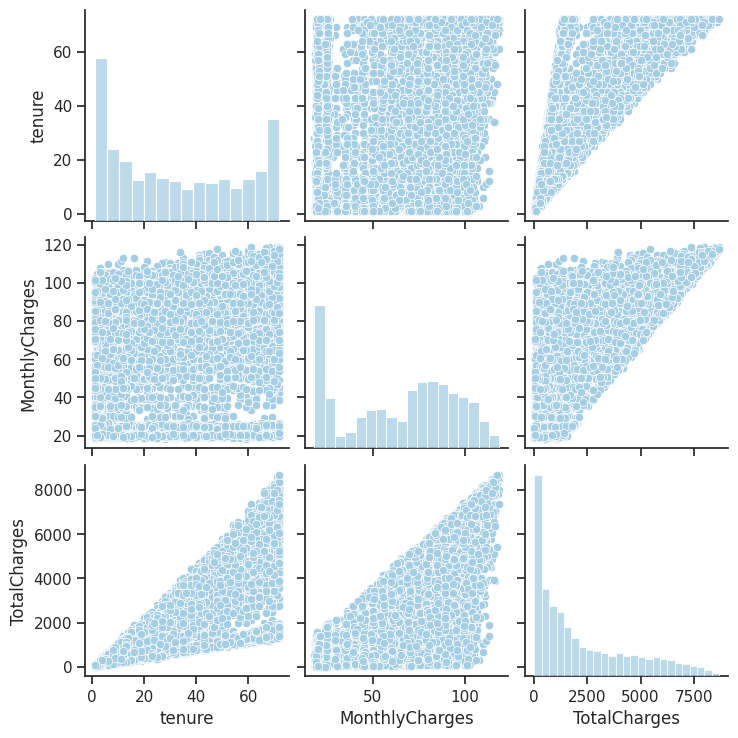

In [ ]:
sns.pairplot(df,vars=['tenure','MonthlyCharges','TotalCharges'])

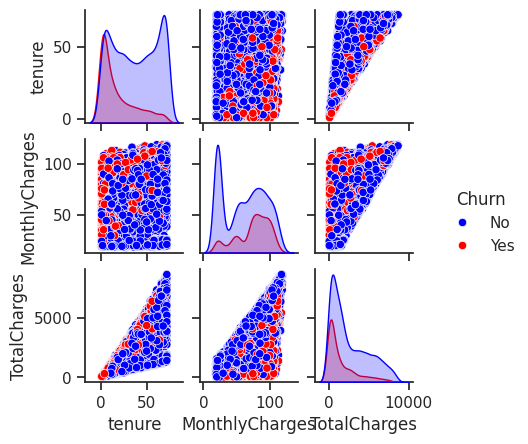

In [ ]:
#sns.set_palette("viridis")

sns.pairplot(df,vars=['tenure','MonthlyCharges','TotalCharges'],hue='Churn',height=1.5,palette=['blue','red'])

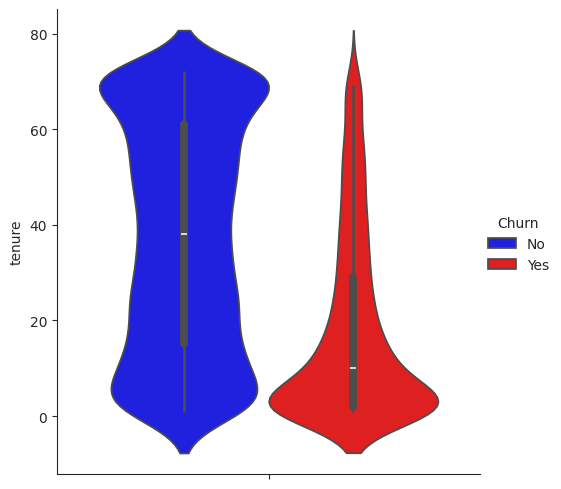

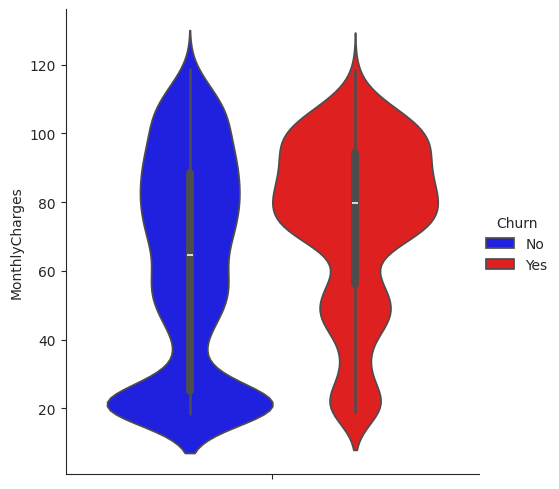

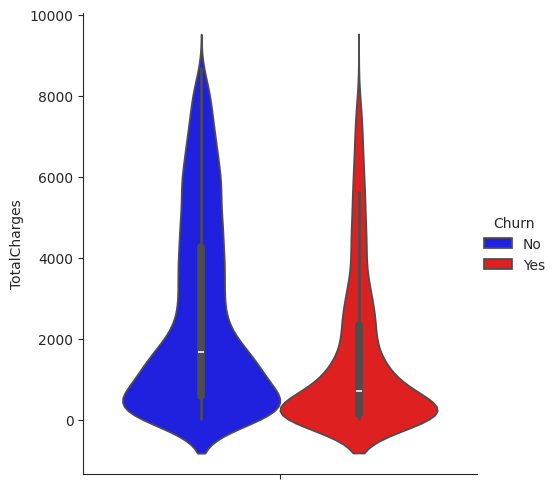

In [ ]:
#fig,ax=plt.subplots(nrows=1,ncols=3,sharey=False,figsize=(9,3))
sns.catplot(data=df,y='tenure',kind='violin',hue='Churn',palette=['blue','red'])
sns.catplot(data=df,y='MonthlyCharges',kind='violin',hue='Churn',palette=['blue','red'])
sns.catplot(data=df,y='TotalCharges',kind='violin',hue='Churn',palette=['blue','red'])

In [ ]:
df[['tenure','MonthlyCharges','TotalCharges']].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


<Axes: >

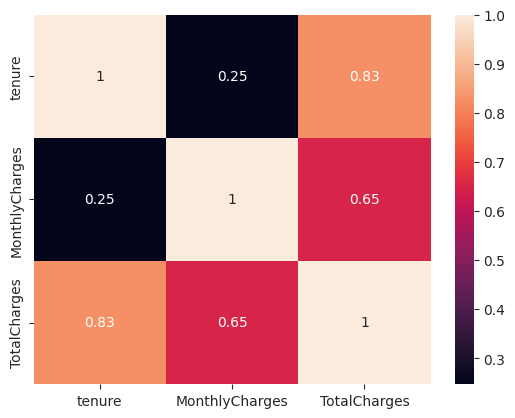

In [ ]:
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True)

In [ ]:
df['MonthlyCharges'].groupby(df['Churn']).sum()

,MonthlyCharges
Churn,
No,316530.15
Yes,139130.85


Text(0.5, 1.0, 'Monthly charges %')

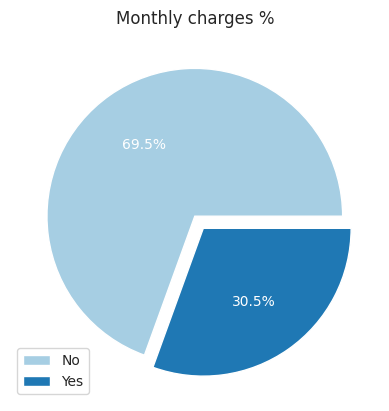

In [ ]:
sns.set_palette("Paired")
#sns.set_style("whitegrid")
plt.pie(df['MonthlyCharges'].groupby(df['Churn']).sum(),labels=[' ',' '],explode=[0,0.1],autopct='%1.1f%%',textprops=dict(color="w"))
plt.legend(loc=3, labels=df.Churn.value_counts().index)
plt.title('Monthly charges %')

In [ ]:
profit=df['MonthlyCharges'].mean()*190.0*12.0
print(profit)

147739.9146757679


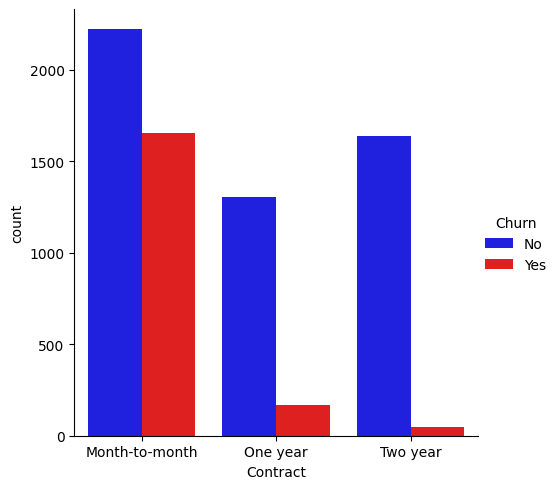

In [ ]:

#df1=df.groupby(['Churn']).Contract.value_counts().unstack()
#print(df1)
#df1['One year']=df1['One year']+df1['Two year']
#df1=df1.drop(['Two year'],axis=1)
#print(df1)
#df1.rename(columns={"One year": "longer"}, inplace=True)
sns.catplot(data=df,x='Contract',kind='count',hue='Churn',palette=['blue','red'])


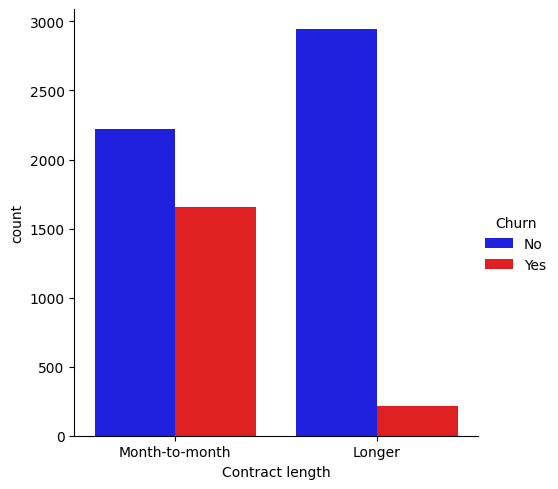

In [ ]:

df['Contract length']=np.where(df['Contract']=='Month-to-month','Month-to-month','Longer')
df.head()
sns.catplot(data=df,x='Contract length',kind='count',hue='Churn',palette=['blue','red'])